# Gerando nuvem de palavras


### Vamos importar as bibliotecas necessárias


In [2]:
from gensim.models import KeyedVectors
from wordcloud import WordCloud


D:\Users\roger\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Carregando o modelo já treinado

In [3]:
#model = KeyedVectors.load_word2vec_format("word2vec-harry-potter.bin", binary=True)
model = KeyedVectors.load("corpus_scielo.model")

### Gerar um dicionário com as palavras do modelo
Caso você use a biblioteca ```gensim``` versão 1.0.0 ou superior, use o código como ele está (```model.wv.vocab```). Caso contrário, descomente a linha acima pra que funcione (```model.vocab```).

In [4]:
ponct = [':', ';', '!', '?', '.', ',', '[', ']', '@', '#', '(', ')', '/', '"', "'"]

w2v = dict()
#for item in model.vocab:
for item in model.wv.index_to_key:
    it = item.lower()
    for let in it:
        if let in ponct:
            it = it.replace(let, '')
    if it == '':
        continue
    else:
        if it in w2v:
            #w2v[it]+=model.vocab[item].count
            w2v[it]+=model.wv.get_vecattr(item, "count")
        else:
            #w2v[it]=model.vocab[item].count
            w2v[it]=model.wv.get_vecattr(item, "count") #gensim 1.0.0+
            
w2vSorted=dict(sorted(w2v.items(), key=lambda x: x[1],reverse=True))

import pandas as pd

pd.set_option('max_colwidth',150)
data = pd.DataFrame.from_dict(w2vSorted.items())
data.columns = ['Word', 'Count']
data = data.sort_index()
data.head(20)

,Word,Count
0,paciente,57425
1,resultar,53241
2,estudar,53138
3,nao,48495
4,apresentar,45945
5,analisar,43538
6,ser,35153
7,realizar,32591
8,utilizar,31359
9,ano,29473


### Gerando a nuvem de palavras (unigramas)

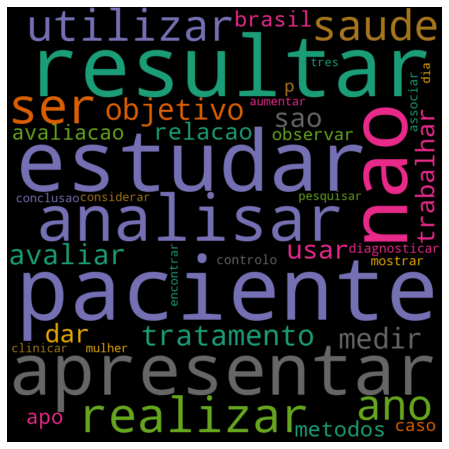

In [5]:
stop_words = ["o", "a", "e", "da", "meu", "em", "você", "de", "ao", "os","nao"]

# configuracoes
wcBr = WordCloud(width = 800,
               height = 800,
               stopwords = stop_words,
               colormap = "Dark2",
               min_font_size = 10,
               max_words=40)
               
wcBr.generate_from_frequencies(frequencies = w2v)

import matplotlib.pyplot as plt

#imrimir
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wcBr, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud_bigram") #salva imagem no diretorio
    
plt.show()

### Gerando a nuvem de palavras (bigramas)

Vamos gerar também a nuvem de bigramas, que são duas palavras que aparecem juntas com frequencia e que fazem sentido unidas. Para isso primeiro vamos encontrar os bigramas no modelo.

In [1]:
# bigramas frequentes

bigr = {word : count for (word, count) in w2vSorted.items() for letter in word if (letter == '_')}

pd.set_option('max_colwidth',150)
bg = pd.DataFrame.from_dict(bigr.items())
bg.columns = ['Word', 'Count']
bg = bg.sort_index()
bg.head(20) #top 10

NameError: name 'w2vSorted' is not defined

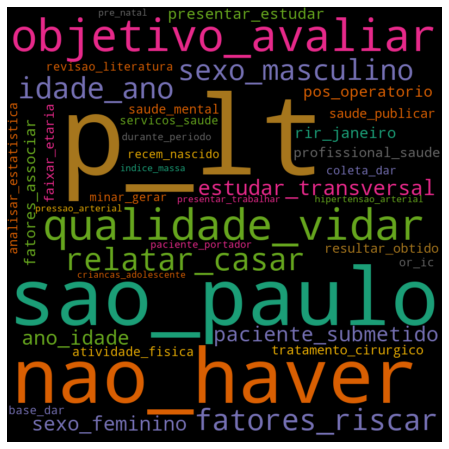

In [7]:
from wordcloud import WordCloud
stop_words = ["o","a","e","da", "meu", "em", "você", "de", "ao", "os"]

# configuracao
wcBr = WordCloud(width = 800,
               height = 800,
               stopwords = stop_words,
               colormap = "Dark2",
               min_font_size = 10,
               max_words=40)
               
wcBr.generate_from_frequencies(frequencies = bigr)

import matplotlib.pyplot as plt

#imprime
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wcBr, interpolation="bilinear")
plt.axis("off")
plt.savefig("wordcloud_bigram") #salva imagem no diretorio
    
plt.show()